In [ ]:
import pandas as pd
from tqdm import tqdm
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/2022/Organizacion de datos/Material Alumnos/Trabajo Práctico 1/Datasets/properati_argentina_2021.csv')
dataset.shape

(460154, 20)

In [ ]:
dataset.head()

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
0,XZq2dFGxBiboHY3Bo/tqlw==,2021-09-09,2022-01-27,2021-09-09,-38.957632,-68.105443,Neuquén,NaN,NaN,NaN,NaN,Venta,Casa,6.0,NaN,NaN,206.0,NaN,NaN,Casa - Capital
1,8afoK+yMH/rnnlYiktwgNA==,2021-09-09,2021-10-23,2021-09-09,-34.888878,-56.092368,Montevideo,NaN,NaN,NaN,NaN,Venta,Casa,4.0,3.0,193.0,193.0,390000.0,USD,Casa - Malvín
2,iVaG5rBB47dd1Ya4BMXREA==,2021-09-09,2022-03-09,2021-09-09,-32.488717,-58.257499,Entre Ríos,NaN,NaN,NaN,NaN,Venta,Casa,NaN,NaN,110.0,45.0,47000.0,USD,Casa - Uruguay
3,QE1QVMWKAHWkd0qT0FtPWA==,2021-09-09,2022-01-27,2021-09-09,-34.900165,-54.808453,Maldonado,NaN,NaN,NaN,NaN,Venta,Casa,NaN,3.0,NaN,180.0,400000.0,USD,Casa - El Chorro
4,tJ5lSk7IysG/71OGhacNZA==,2021-09-09,2022-01-27,2021-09-09,-38.954528,-68.041862,Neuquén,NaN,NaN,NaN,NaN,Venta,PH,3.0,2.0,NaN,98.0,102000.0,USD,PH - Villa Farrell


# 1. Análisis Exploratorio y Preprocesamiento de Datos

### Seleccion de datos

In [ ]:
dataset.columns.tolist()

['id',
 'start_date',
 'end_date',
 'created_on',
 'latitud',
 'longitud',
 'place_l2',
 'place_l3',
 'place_l4',
 'place_l5',
 'place_l6',
 'operation',
 'property_type',
 'property_rooms',
 'property_bedrooms',
 'property_surface_total',
 'property_surface_covered',
 'property_price',
 'property_currency',
 'property_title']

In [ ]:
filtro_tipo_propiedad = ['casa', 'ph','departamento']
filtro_operacion = ['venta']
filtro_ubicacion = ['capital federal']
filtro_moneda = ['usd']

filtros = {
    'property_type': filtro_tipo_propiedad,
    'operation': filtro_operacion,
    'place_l2': filtro_ubicacion,
    'property_currency': filtro_moneda
}

In [ ]:
dataset_normalizado = dataset.copy()

for columna in filtros:
  dataset_normalizado[columna] = dataset[columna].str.lower()

In [ ]:
dataset_filtrado = dataset_normalizado.copy()

for columna_a_filtrar, filtro in filtros.items():
  dataset_filtrado = dataset_filtrado[dataset_filtrado[columna_a_filtrar].isin(filtro)]

dataset_filtrado.shape

(94249, 20)

In [ ]:
dataset_filtrado.head()

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
25,CyZu6IaZgmQYGk8jmPajCg==,2021-09-09,2021-09-26,2021-09-09,NaN,NaN,capital federal,NaN,NaN,NaN,NaN,venta,casa,4.0,3.0,171.0,133.0,210000.0,usd,VENTA CASA LLAVE EN MANO - COSTA ESMERALDA
42,d3Z0MblSb2IMBoOBMGJEEQ==,2021-09-09,2021-09-26,2021-09-09,-34.637319,-58.361124,capital federal,Boca,NaN,NaN,NaN,venta,departamento,3.0,2.0,58.0,55.0,82900.0,usd,VENTA TRES AMBIENTES LA BOCA PISO ALTO
43,rL7qPkQnomsMGu2ViS3sBw==,2021-09-09,2021-09-28,2021-09-09,-34.628647,-58.361871,capital federal,Boca,NaN,NaN,NaN,venta,departamento,4.0,3.0,70.0,70.0,99000.0,usd,Departamento - 4 Ambientes - Catalinas Sur
49,vuX/ccLAMVml4qWRFcOJUA==,2021-09-09,2022-01-05,2021-09-09,-34.610027,-58.401934,capital federal,Once,NaN,NaN,NaN,venta,departamento,4.0,2.0,NaN,104.0,146000.0,usd,Venta departamento 4 ambientes Once
51,ZTtSCeqZ3HUgf5jjwEzRcw==,2021-09-09,2022-03-09,2021-09-09,-34.631621,-58.416825,capital federal,Boedo,NaN,NaN,NaN,venta,ph,4.0,2.0,NaN,73.0,250000.0,usd,PH - Boedo


Para este punto, tenemos el dataset filtrado por lo pedido e incluso normalizado (sin mayusculas)

In [ ]:
filas_totales = dataset_filtrado.shape[0]
dataset_filtrado.isna().sum()/filas_totales

id                          0.000000
start_date                  0.000000
end_date                    0.000000
created_on                  0.000000
latitud                     0.039576
longitud                    0.039576
place_l2                    0.000000
place_l3                    0.004424
place_l4                    0.961347
place_l5                    1.000000
place_l6                    1.000000
operation                   0.000000
property_type               0.000000
property_rooms              0.011077
property_bedrooms           0.116574
property_surface_total      0.051396
property_surface_covered    0.035587
property_price              0.000000
property_currency           0.000000
property_title              0.000000
dtype: float64

Se puede apreciar que las columnas `place_l5` y `place_l6` contienen `NaN` en todas sus filas. Es por eso que nos deshacemos de ellas. `place_4` contiene `NaN` en el 96% de sus filas por lo que tambien la eliminamos.

Por el otro lado, el `id` es una variable unica e aleatoria para cada propiedad, por lo que no nos sirve para predecir nada. Por esta razon, la eliminamos tambien.

In [ ]:
def separate_date(dataset, column_name):
  dataset[f'{column_name}_year'] = dataset[column_name].str[:4].astype(int)
  dataset[f'{column_name}_month'] = dataset[column_name].str[5:7].astype(int)
  dataset[f'{column_name}_day'] = dataset[column_name].str[8:10].astype(int)
  dataset.drop([column_name], axis=1, inplace=True)

In [ ]:
columnas_eliminar = ['id', 'place_l4', 'place_l5', 'place_l6']
dataset_trabajo = dataset_filtrado.drop(columnas_eliminar, axis=1)
separate_date(dataset_trabajo, 'start_date')
separate_date(dataset_trabajo, 'end_date')
separate_date(dataset_trabajo, 'created_on')
dataset_trabajo.head()

,latitud,longitud,place_l2,place_l3,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,...,property_title,start_date_year,start_date_month,start_date_day,end_date_year,end_date_month,end_date_day,created_on_year,created_on_month,created_on_day
25,NaN,NaN,capital federal,NaN,venta,casa,4.0,3.0,171.0,133.0,...,VENTA CASA LLAVE EN MANO - COSTA ESMERALDA,2021,9,9,2021,9,26,2021,9,9
42,-34.637319,-58.361124,capital federal,Boca,venta,departamento,3.0,2.0,58.0,55.0,...,VENTA TRES AMBIENTES LA BOCA PISO ALTO,2021,9,9,2021,9,26,2021,9,9
43,-34.628647,-58.361871,capital federal,Boca,venta,departamento,4.0,3.0,70.0,70.0,...,Departamento - 4 Ambientes - Catalinas Sur,2021,9,9,2021,9,28,2021,9,9
49,-34.610027,-58.401934,capital federal,Once,venta,departamento,4.0,2.0,NaN,104.0,...,Venta departamento 4 ambientes Once,2021,9,9,2022,1,5,2021,9,9
51,-34.631621,-58.416825,capital federal,Boedo,venta,ph,4.0,2.0,NaN,73.0,...,PH - Boedo,2021,9,9,2022,3,9,2021,9,9


-------------------------------------------------------------------

HASTA ACA LLEGA LA NORMALIZACION Y OBTENCION DE LOS DATOS DESEADOS

-------------------------------------------------------------------

In [ ]:
variables_cuantitativas = dataset_trabajo.describe()
variables_cuantitativas

,latitud,longitud,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,start_date_year,start_date_month,start_date_day,end_date_year,end_date_month,end_date_day,created_on_year,created_on_month,created_on_day
count,90519.000000,90519.000000,93205.000000,83262.000000,89405.000000,90895.000000,9.424900e+04,94249.0,94249.000000,94249.000000,94249.000000,94249.000000,94249.000000,94249.0,94249.000000,94249.000000
mean,-34.591481,-58.449795,2.822799,2.014629,109.092970,87.931932,2.262382e+05,2021.0,6.512854,15.504822,2448.003756,5.667508,15.170920,2021.0,6.512854,15.504822
std,0.181719,0.292630,1.426148,1.129767,980.401976,990.927129,3.186035e+05,0.0,3.400043,8.424550,1794.994074,3.429393,9.838623,0.0,3.400043,8.424550
min,-53.788624,-71.471192,1.000000,-1.000000,10.000000,1.000000,5.000000e+03,2021.0,1.000000,1.000000,2021.000000,1.000000,1.000000,2021.0,1.000000,1.000000
25%,-34.615975,-58.466522,2.000000,1.000000,45.000000,40.000000,9.500000e+04,2021.0,4.000000,8.000000,2021.000000,3.000000,5.000000,2021.0,4.000000,8.000000
50%,-34.595790,-58.439000,3.000000,2.000000,65.000000,58.000000,1.439000e+05,2021.0,6.000000,16.000000,2021.000000,6.000000,14.000000,2021.0,6.000000,16.000000
75%,-34.577413,-58.408862,4.000000,3.000000,105.000000,88.000000,2.370000e+05,2021.0,9.000000,23.000000,2022.000000,8.000000,26.000000,2021.0,9.000000,23.000000
max,-24.219827,-54.133330,40.000000,70.000000,137000.000000,217000.000000,2.140000e+07,2021.0,12.000000,31.000000,9999.000000,12.000000,31.000000,2021.0,12.000000,31.000000


Dropeo la variable property_title ya que realmente no es una variable cualitativa. Si intentara obtener sus valores unicos, obtendria muchisimos distintos.

In [ ]:
variables_cualitativas = dataset_trabajo.drop(variables_cuantitativas.columns, axis=1)
variables_cualitativas.drop(['property_title'], axis=1, inplace=True)
variables_cualitativas.nunique()

place_l2              1
place_l3             57
operation             1
property_type         3
property_currency     1
dtype: int64

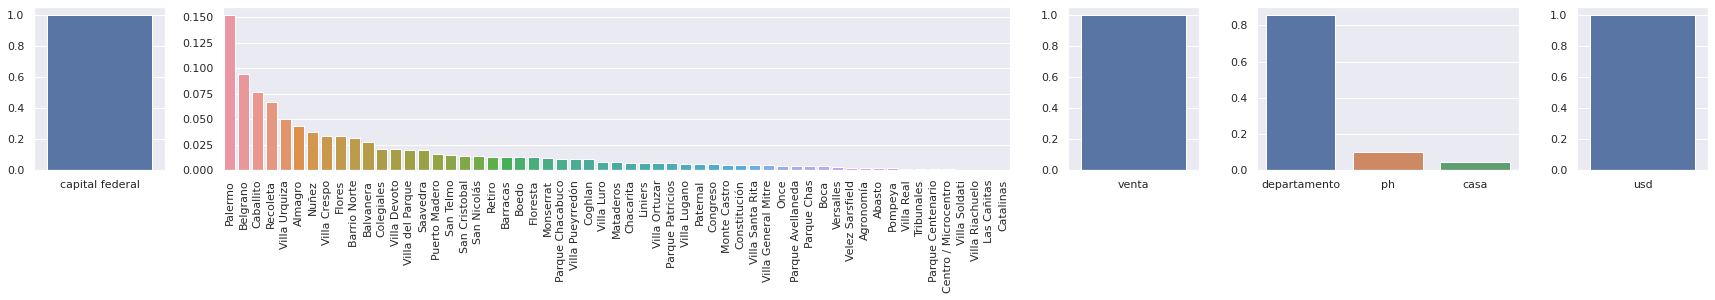

In [ ]:
UMBRAL_ROTACION = 10
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(30,3), gridspec_kw={'width_ratios': [1, 6, 1, 2, 1]})

for i, column in enumerate(variables_cualitativas):
  frecuencia_absoluta = variables_cualitativas[column].value_counts()
  frecuencia_relativa = frecuencia_absoluta / frecuencia_absoluta.sum()
  sns.barplot(ax=axes[i], x=frecuencia_relativa.index, y=frecuencia_relativa.values)
  if len(frecuencia_relativa.index) > UMBRAL_ROTACION:
    axes[i].tick_params('x', labelrotation=90)


plt.show()